In [1]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Custom functions
sys.path.insert(1, '../..')
from utils import *

# scperturb package
sys.path.insert(1, '../../../package/src/')
from scperturb import *

%matplotlib inline

In [2]:
# paths
at_home = False if '/fast/work/users/' in os.getcwd() else True
data_path = '/extra/stefan/data/perturbation_resource_paper/' if at_home else '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'
signatures_path = '/home/peidli/utils/scrnaseq_signature_collection/' if at_home else '/fast/work/users/peidlis_c/utils/scrnaseq_signature_collection/'
utils_path = '/extra/stefan/utils/scrnaseq_utils/' if at_home else '/fast/work/users/peidlis_c/utils/single_cell_rna_seq/scrnaseq_utils/'

# # Stefan's utils
# sys.path.insert(1, utils_path)
# from scrnaseq_util_functions import *

In [3]:
h5_files = {}
spath = '/fast/scratch/users/peidlis_c/perturbation_resource_paper/'
for path, subdirs, files in os.walk(spath):
    for name in files:
        if '.h5' in name: h5_files[name[:-3]] = os.path.join(path, name)
print(len(h5_files))
# list(h5_files.keys())

28


In [4]:
adata = sc.read(h5_files['tmp_data_PapalexiSatija2021_eccite_RNA'])

In [5]:
ed_full = edist(adata, 'perturbation')

100%|██████████| 84/84 [00:18<00:00,  4.47it/s]


In [6]:
ed_split = edist(adata, 'perturbation_X')

100%|██████████| 168/168 [01:13<00:00,  2.30it/s]


In [7]:
groups_X = ed_split.columns[ed_split.columns.str.endswith('_X')].values
groups = ed_split.columns[~ed_split.columns.str.endswith('_X')].values

In [8]:
ed_split

,control,control_X,IFNGR2g1,IFNGR2g1_X,ATF2g1_X,ATF2g1,IFNGR1g3,IFNGR1g3_X,CD86g1_X,CD86g1,...,STAT2g4,STAT2g4_X,BRD4g1,BRD4g1_X,SMAD4g3_X,SMAD4g3,IRF7g4,IRF7g4_X,STAT1g1,STAT1g1_X
control,0.000000,-4.860225,163.346868,135.549388,7.273807,8.494321,139.446321,137.475957,-0.156676,9.451423,...,17.946147,9.716716,81.837579,84.351780,51.529300,55.602235,0.938916,4.825170,162.682683,139.605280
control_X,-4.860225,0.000000,170.034370,134.788332,-2.027969,-7.014657,135.854643,153.265429,-3.555077,-11.608042,...,12.727134,17.001541,83.999100,84.824046,80.316602,90.358481,-9.099682,-6.579062,176.483923,141.477199
IFNGR2g1,163.346868,170.034370,0.000000,3.712877,207.450522,177.055910,10.426803,7.462041,179.709351,175.376217,...,144.073281,149.893089,224.114435,270.578915,232.430642,207.730695,155.273305,185.716465,8.269907,5.824207
IFNGR2g1_X,135.549388,134.788332,3.712877,0.000000,163.312018,150.194896,-2.956666,10.656658,150.194071,135.091798,...,114.282947,122.502964,196.849471,241.483730,188.142696,178.262070,125.154543,146.113456,21.549676,4.696169
ATF2g1_X,7.273807,-2.027969,207.450522,163.312018,0.000000,4.789352,152.016498,181.446247,12.327013,0.551606,...,24.844393,16.350868,92.311499,92.960829,43.024672,61.542401,-1.828519,-6.877133,219.036396,185.401479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMAD4g3,55.602235,90.358481,207.730695,178.262070,61.542401,83.594524,183.411626,192.755554,88.027210,102.334201,...,88.855962,60.418095,110.174779,130.310214,2.007960,0.000000,71.829569,88.313760,200.439581,204.958521
IRF7g4,0.938916,-9.099682,155.273305,125.154543,-1.828519,-7.048866,116.297317,136.065688,-0.469818,-10.528383,...,7.925232,12.962504,82.848544,91.171130,63.580681,71.829569,0.000000,-15.837186,160.937739,134.665423
IRF7g4_X,4.825170,-6.579062,185.716465,146.113456,-6.877133,-4.325890,132.186753,158.061507,6.607682,-7.241504,...,9.090698,14.473508,84.049623,90.936807,72.296560,88.313760,-15.837186,0.000000,182.937515,153.198750
STAT1g1,162.682683,176.483923,8.269907,21.549676,219.036396,190.802844,27.195040,39.033792,193.097592,183.191755,...,125.856297,136.793885,234.706286,285.263082,238.510075,200.439581,160.937739,182.937515,0.000000,8.467265


In [9]:
res = {}
for group in groups:
    res[group] = ed_split.loc[group, f'{group}_X']
sim_to_split = pd.Series(res)
sim_to_split

control     -4.860225
IFNGR2g1     3.712877
ATF2g1       4.789352
IFNGR1g3    12.101871
CD86g1      -1.591053
              ...    
STAT2g4     -6.889923
BRD4g1       1.129045
SMAD4g3      2.007960
IRF7g4     -15.837186
STAT1g1      8.467265
Length: 84, dtype: float64

In [10]:
def evaluate_split(adata, key='perturbation'):
    random_split(adata, key)
    ed_split = edist(adata, 'perturbation_X')
    groups = ed_split.columns[~ed_split.columns.str.endswith('_X')].values
    res = {}
    for group in groups:
        res[group] = ed_split.loc[group, f'{group}_X']
    sim_to_split = pd.Series(res)
    return sim_to_split

In [11]:
sim_to_split = evaluate_split(adata)

100%|██████████| 168/168 [01:12<00:00,  2.31it/s]


In [12]:
bdata = adata.copy()
sc.pp.pca(bdata, use_highly_variable=False)
sim_to_split_ = evaluate_split(bdata)

100%|██████████| 168/168 [01:12<00:00,  2.31it/s]


In [13]:
df = pd.concat([sim_to_split, sim_to_split_], axis=1)
df.columns = ['Edistance between splits (HVG=True)', 'Edistance between splits (HVG=False)']

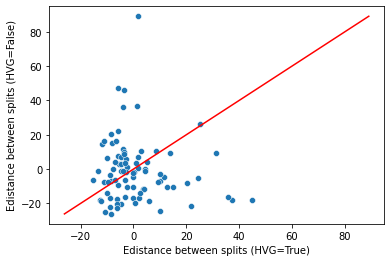

In [17]:
sns.scatterplot(data=df, x='Edistance between splits (HVG=True)', y='Edistance between splits (HVG=False)')
mi = np.min(df.values)
ma = np.max(df.values)
pl.plot([mi,ma], [mi,ma],c='r')
pl.show()

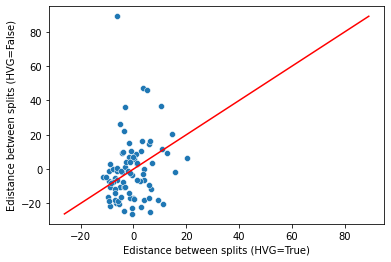

In [15]:
sns.scatterplot(data=df, x='Edistance between splits (HVG=True)', y='Edistance between splits (HVG=False)')
mi = np.min(df.values)
ma = np.max(df.values)
pl.plot([mi,ma], [mi,ma],c='r')
pl.show()

In [16]:
df.sort_values('Edistance between splits (HVG=False)')

,Edistance between splits (HVG=True),Edistance between splits (HVG=False)
ETV7g1,-0.685262,-26.087681
PDCD1LG2g1,6.267423,-24.973108
CMTM6g3,-3.420207,-24.302542
ETV7g3,-0.573320,-22.452971
JAK2g1,2.993568,-22.043707
...,...,...
CD86g2,-3.011224,36.032630
CAV1g4,10.525492,36.819344
BRD4g3,5.014113,45.829960
CMTM6g1,3.772668,47.516586


In [17]:
adata.obs.value_counts(['perturbation', 'guide_id'], sort=False)

perturbation  guide_id
ATF2g1        ATF2g1      50
ATF2g2        ATF2g2      50
ATF2g3        ATF2g3      50
ATF2g4        ATF2g4      50
BRD4g1        BRD4g1      50
                          ..
control       NTg5         8
              NTg7         7
              NTg8         1
              NTg9         8
              NTg10        7
Length: 92, dtype: int64

<AxesSubplot:ylabel='Count'>

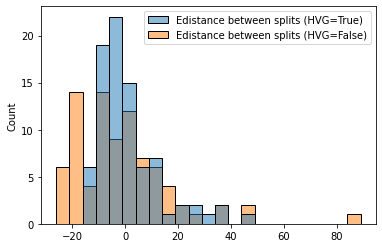

In [27]:
sns.histplot(data=df)

In [19]:
df.mean()

Edistance between splits (HVG=True)     0.706578
Edistance between splits (HVG=False)   -0.900592
dtype: float64

In [ ]:
for pert in adata.obs.perturbation.unique():
    subdata = adata[adata.obs.perturbation.isin()]

In [28]:
adata

AnnData object with n_obs × n_vars = 4200 × 15987
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'n_counts', 'perturbation_X'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [31]:
ed_ns = edist(adata, dist='euclidean')

100%|██████████| 84/84 [00:25<00:00,  3.24it/s]


In [34]:
np.min(ed_ns.values)

-0.2314814413265296

In [36]:
from tqdm import tqdm
from sklearn.metrics import pairwise_distances
from statsmodels.stats.multitest import multipletests

def pairwise_pca_distances_(adata, obs_key, obsm_key='X_pca', dist='sqeuclidean', verbose=True):
    """Average of pairwise PCA distances between cells of each group in obs_key.
    For each pair of groups defined in adata.obs[obs_key] (e.g. perturbations)
    computes all pairwise distances between cells in adata.obsm[obsm_key] (e.g. PCA space)
    and averages them per group-pair. This results in a distance matrix between all groups.

    Arguments
    ---------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix.
    obs_key: `str` in adata.obs.keys()
        Key in adata.obs specifying the groups to consider.
    obsm_key: `str` in adata.obsm (default: `adata.obsm['X_pca']`)
        Key for embedding coordinates to use.
    dist: `str` for any distance in scipy.spatial.distance (default: `sqeuclidean`)
        Distance metric to use in embedding space.
    verbose: `bool` (default: `True`)
        Whether to show a progress bar iterating over all groups.

    Returns
    -------
    pwd: pandas.DataFrame
        DataFrame with pairwise PCA distances between all groups.
    """

    if obs_key=='X_pca':
        print('PCA embedding not found, computing...')
        sc.pp.pca(adata)

    groups = pd.unique(adata.obs[obs_key])
    df = pd.DataFrame(index=groups, columns=groups, dtype=float)
    fct = tqdm if verbose else lambda x: x
    for i, p1 in enumerate(fct(groups)):
        x1 = adata[adata.obs[obs_key]==p1].obsm[obsm_key].copy()
        N = len(x1)
        for p2 in groups[i:]:
            x2 = adata[adata.obs[obs_key]==p2].obsm[obsm_key].copy()
            pwd = pairwise_distances(x1, x2, metric=dist)
            M = len(x2)
            factor = N*M if p1!=p2 else N**2 - N  # correct mean for zero diagonal if comparing to same set
            mean_pwd = np.sum(pwd) / factor
            df.loc[p1, p2] = mean_pwd
            df.loc[p2, p1] = mean_pwd
    return df

def edist_(adata, obs_key='perturbation', obsm_key='X_pca', pwd=None, dist='sqeuclidean', verbose=True):
    """Computes the edistance to control. Accepts precomputed pwd.
    Computes the pairwise E-distances between all groups of cells defined in
    adata.obs[obs_key] (e.g. perturbations). Distances are computed in embedding
    space given by adata.obsm[obsm_key] (e.g. PCA space).

    Arguments
    ---------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix.
    obs_key: `str` in adata.obs.keys() (default: `perturbation`)
        Key in adata.obs specifying the groups to consider.
    obsm_key: `str` in adata.obsm (default: `adata.obsm['X_pca']`)
        Key for embedding coordinates to use.
    dist: `str` for any distance in scipy.spatial.distance (default: `sqeuclidean`)
        Distance metric to use in embedding space.
    verbose: `bool` (default: `True`)
        Whether to show a progress bar iterating over all groups.

    Returns
    -------
    estats: pandas.DataFrame
        DataFrame with pairwise E-distances between all groups.
    """

    pwd = pairwise_pca_distances_(adata, obs_key=obs_key, obsm_key=obsm_key, dist=dist, verbose=verbose) if pwd is None else pwd
    # derive basic statistics
    sigmas = np.diag(pwd)
    deltas = pwd
    estats = 2 * deltas - sigmas - sigmas[:, np.newaxis]
    return estats

In [37]:
ed_ns_ = edist_(adata, dist='euclidean')

100%|██████████| 84/84 [00:25<00:00,  3.24it/s]


In [38]:
np.min(ed_ns_.values)

0.0

In [39]:
ed_ns_

,control,IFNGR2g1,ATF2g1,IFNGR1g3,CD86g1,IFNGR2g2,POU2F2g1,JAK2g2,IFNGR1g2,TNFRSF14g1,...,IRF7g3,ATF2g3,PDCD1LG2g2,STAT3g4,STAT3g2,STAT2g4,BRD4g1,SMAD4g3,IRF7g4,STAT1g1
control,0.000000,5.044092,0.722336,4.809097,0.702148,3.189998,0.719958,4.189928,3.086614,0.607455,...,0.774136,0.661808,0.726130,0.946570,0.728328,1.222314,3.122748,2.770495,0.757511,5.191605
IFNGR2g1,5.044092,0.000000,5.482713,0.726189,5.238150,0.765484,5.350975,0.994920,0.931969,4.738184,...,4.181412,5.127641,5.502519,4.631469,5.083361,4.482722,7.220525,6.495734,5.151606,0.889697
ATF2g1,0.722336,5.482713,0.000000,5.071917,0.638413,3.461494,0.701178,4.360133,3.260247,0.743334,...,0.882641,0.589528,0.849100,1.041234,0.596220,1.249106,2.613275,2.591019,0.614031,5.792078
IFNGR1g3,4.809097,0.726189,5.071917,0.000000,5.065189,0.893317,5.033148,0.920553,0.877617,4.520061,...,4.116133,4.882827,5.079458,4.756333,4.860594,4.548511,6.907248,6.287820,4.712795,1.328252
CD86g1,0.702148,5.238150,0.638413,5.065189,0.000000,3.264163,0.737350,4.530117,3.194506,0.630741,...,0.911709,0.556059,0.692428,0.863797,0.625142,0.991137,2.544331,3.240809,0.702084,5.365900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STAT2g4,1.222314,4.482722,1.249106,4.548511,0.991137,2.775413,1.005494,3.979186,2.813106,0.998509,...,1.137328,1.073806,1.188206,1.174259,1.146405,0.000000,2.814447,2.794856,1.141012,4.141987
BRD4g1,3.122748,7.220525,2.613275,6.907248,2.544331,5.484828,3.036213,6.739102,5.115312,2.495759,...,3.475422,2.568347,3.003134,3.186897,2.638970,2.814447,0.000000,4.016303,3.280947,6.975178
SMAD4g3,2.770495,6.495734,2.591019,6.287820,3.240809,5.088266,2.614166,5.880080,4.529353,2.592656,...,2.637153,2.779484,3.413828,3.068412,2.632223,2.794856,4.016303,0.000000,2.971431,6.915859
IRF7g4,0.757511,5.151606,0.614031,4.712795,0.702084,3.118419,0.679491,4.087089,2.993375,0.847575,...,0.935056,0.795675,0.691553,1.132206,0.723952,1.141012,3.280947,2.971431,0.000000,5.307456


In [40]:
ed_ns

,control,IFNGR2g1,ATF2g1,IFNGR1g3,CD86g1,IFNGR2g2,POU2F2g1,JAK2g2,IFNGR1g2,TNFRSF14g1,...,IRF7g3,ATF2g3,PDCD1LG2g2,STAT3g4,STAT3g2,STAT2g4,BRD4g1,SMAD4g3,IRF7g4,STAT1g1
control,0.000000,4.388302,0.023567,4.153805,0.016894,2.521802,0.063667,3.479272,2.423419,-0.055395,...,0.091511,-0.014035,0.067353,0.276385,0.054300,0.544327,2.468303,2.118798,0.076092,4.535994
IFNGR2g1,4.388302,0.000000,4.803380,0.090334,4.572332,0.116725,4.714121,0.303701,0.288211,4.094771,...,3.518224,4.471235,4.863179,3.980720,4.428770,3.824172,6.585516,5.863474,4.489624,0.253524
ATF2g1,0.023567,4.803380,0.000000,4.393082,-0.070385,2.769755,0.021344,3.625934,2.573509,0.056942,...,0.176473,-0.109857,0.166781,0.347506,-0.101350,0.547576,1.935287,1.915779,-0.090931,5.112925
IFNGR1g3,4.153805,0.090334,4.393082,0.000000,4.399869,0.245056,4.396792,0.229831,0.234357,3.877145,...,3.453442,4.226919,4.440616,4.106082,4.206500,3.890458,6.272737,5.656057,4.051311,0.692576
CD86g1,0.016894,4.572332,-0.070385,4.399869,0.000000,2.585938,0.071031,3.809433,2.521283,-0.042137,...,0.219056,-0.129811,0.023624,0.183584,-0.058914,0.303122,1.879858,2.579084,0.010637,4.700262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STAT2g4,0.544327,3.824172,0.547576,3.890458,0.303122,2.104456,0.346442,3.265769,2.147151,0.332899,...,0.451942,0.395203,0.526670,0.501314,0.469616,0.000000,2.157241,2.140398,0.456833,3.483617
BRD4g1,2.468303,6.585516,1.935287,6.272737,1.879858,4.837413,2.400703,6.049226,4.472899,1.853690,...,2.813578,1.913286,2.365139,2.537493,1.985724,2.157241,0.000000,3.385387,2.620309,6.340349
SMAD4g3,2.118798,5.863474,1.915779,5.656057,2.579084,4.443599,1.981404,5.192952,3.889687,1.953335,...,1.978057,2.127171,2.778581,2.421756,1.981725,2.140398,3.385387,0.000000,2.313541,6.283778
IRF7g4,0.076092,4.489624,-0.090931,4.051311,0.010637,2.444030,0.017007,3.370240,2.323987,0.178532,...,0.246238,0.113640,0.026584,0.455828,0.043731,0.456833,2.620309,2.313541,0.000000,4.645653
